In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 
# Load the datasets
df=pd.read_csv('grid(pos).csv')

selected_columns = ['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c'] 
selected_data = df[selected_columns]

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(selected_data)
df[selected_columns] = normalized_data

df.to_csv('normalized_data.csv', index=False)

X = df.iloc[:,1:4]
y = df.iloc[:,10]
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#Build the model
svm = SVC(kernel="linear")
# Trained the model
svm.fit(X_train, y_train)





NameError: name 'MinMaxScaler' is not defined

In [6]:

y_pred=svm.predict(X_test)
print(y_pred)
acc=accuracy_score(y_test,y_pred)
confusion_mat = confusion_matrix(y_test,y_pred)
print(acc)
print(confusion_mat)

[0 0 0 ... 0 0 0]
0.6425556189389617
[[5632    0]
 [3133    0]]


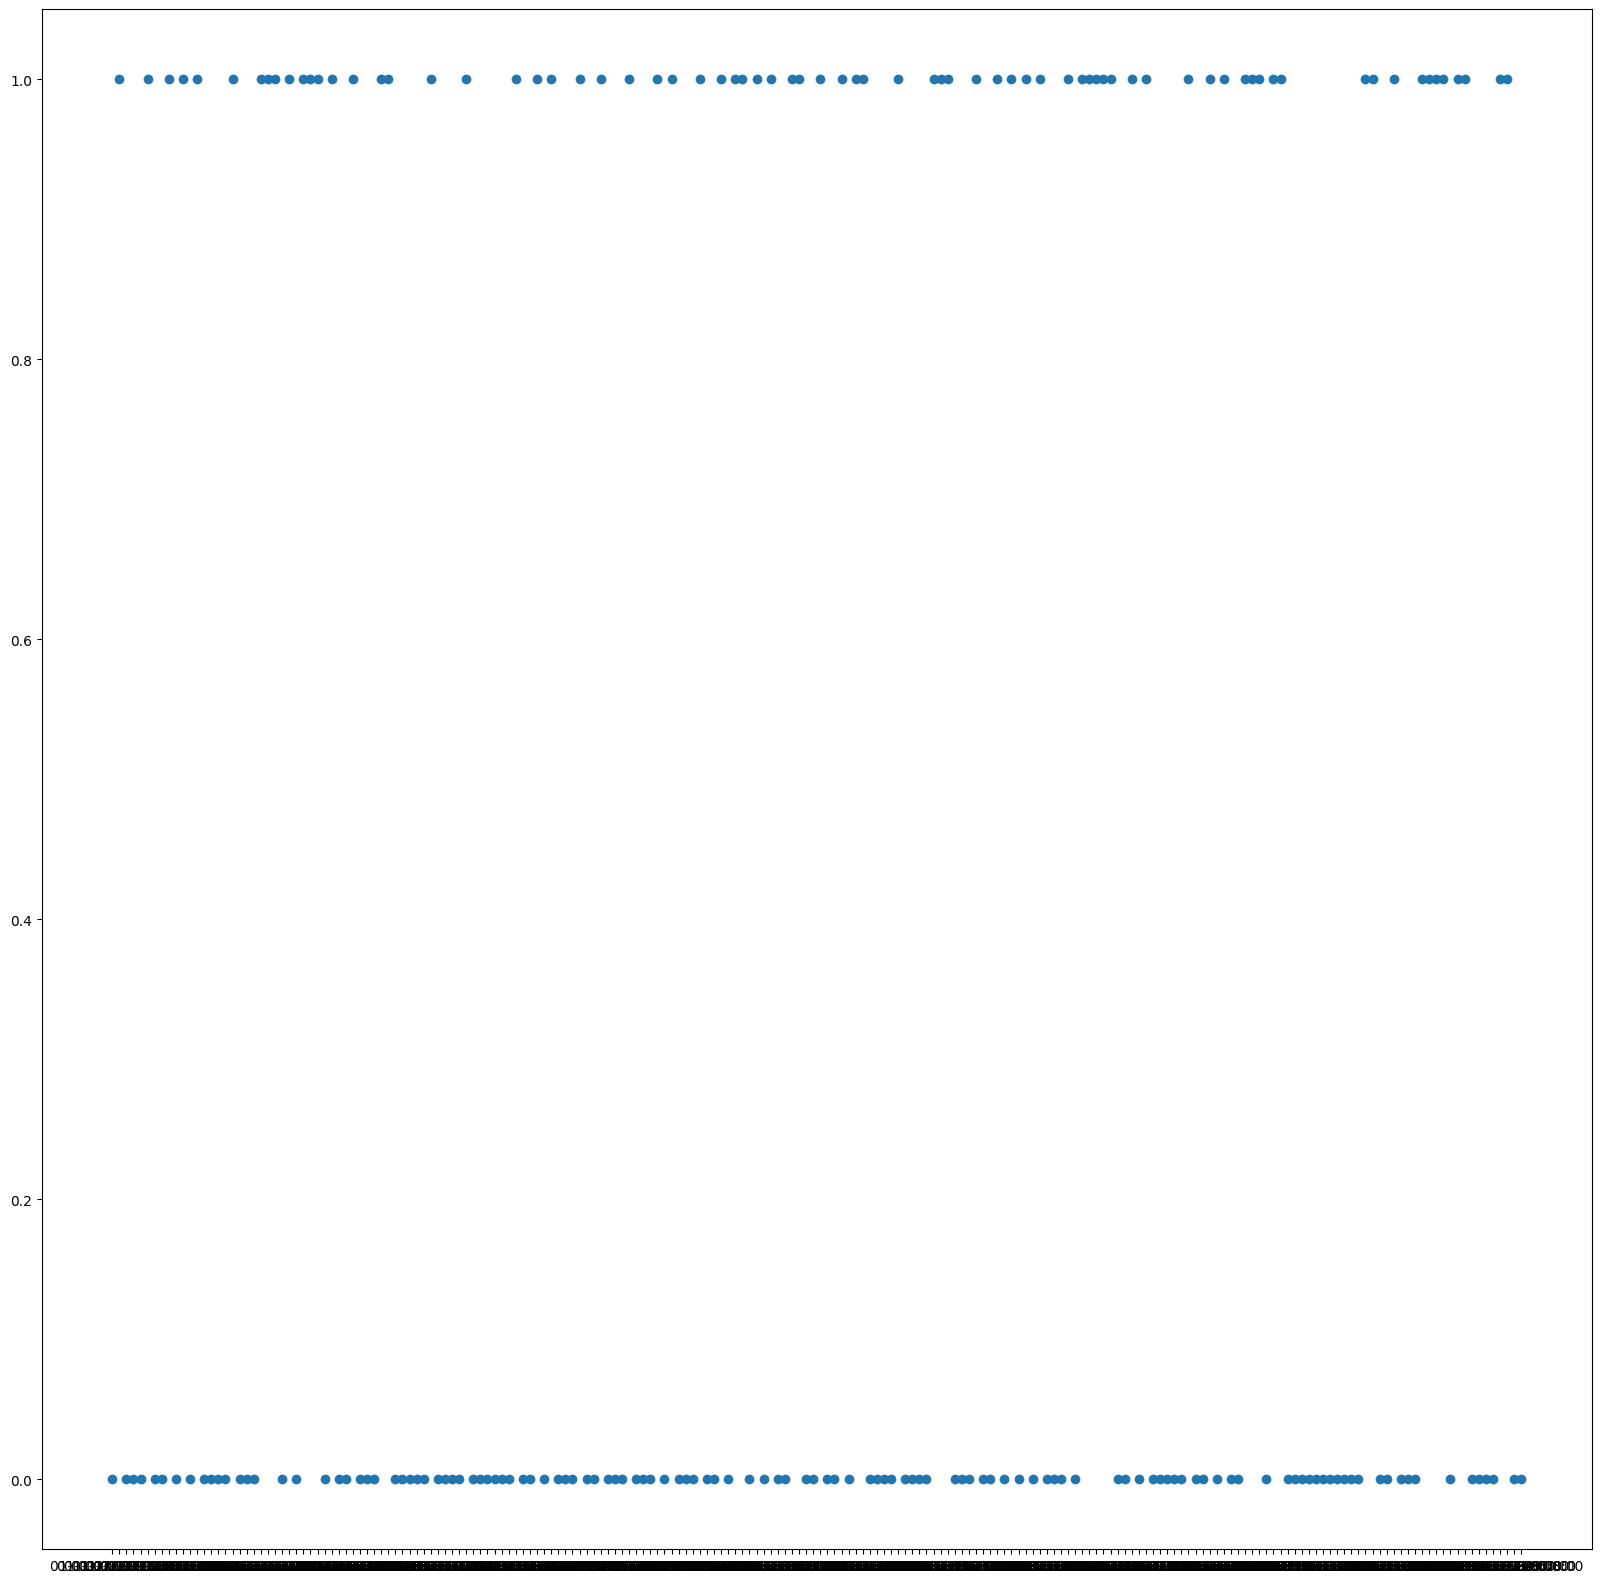

In [20]:
plt.figure(figsize=(20,20))
plt.scatter(df.iloc[:,0].head(200),df.iloc[:,10].head(200))
plt.show()

In [23]:
pip install imblearn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------------ --------------------------- 81.9/258.0 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  256.0/258.0 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Load the dataset
data = pd.read_csv('5_yrs_grid_data2.csv')
new_data=pd.read_csv('test_3month_stable.csv')
# Drop duplicate rows
data = data.drop_duplicates()

# Drop rows with missing values
data = data.dropna()

# Preprocess the data
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d-%m-%Y %H:%M')
data['day'] = data['DateTime'].dt.day
data['hour'] = data['DateTime'].dt.hour
data = data.drop(['DateTime'], axis=1)

# Check if 'Power generated by system | (MW)' column exists in the dataset
if 'Power generated by system | (MW)' in data.columns:
    # Remove outliers in numerical column 'Power generated by system | (MW)'
    data = data[(data['Power generated by system | (MW)'] >= data['Power generated by system | (MW)'].quantile(0.01)) & 
                (data['Power generated by system | (MW)'] <= data['Power generated by system | (MW)'].quantile(0.99))]

# Encode categorical labels
label_encoder = LabelEncoder()
data['stability'] = label_encoder.fit_transform(data['stability'])

# Split the dataset into features and target
X = data.drop(['stability'], axis=1)
y = data['stability']

# Apply SMOTE for data augmentation
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale numerical features
scaler = StandardScaler()
X_resampled[['c1', 'c2', 'c3', 'p1', 'p2', 'p3', 'n1c', 'n2c', 'n3c', 'Power generated by system | (MW)']] = \
    scaler.fit_transform(X_resampled[['c1', 'c2', 'c3', 'p1', 'p2', 'p3', 'n1c', 'n2c', 'n3c', 'Power generated by system | (MW)']])


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a random forest classifier with optimized hyperparameters
# model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
# model.fit(X_train, y_train)
svm = SVC(kernel="linear")
# Trained the model
svm.fit(X_train, y_train)
# Make predictions
y_pred =svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
# recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
# f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
# scores = cross_val_score(model, X_resampled, y_resampled, cv=5)

print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
# print("Cross-Validation Scores:", scores)
# print("Mean Accuracy:", scores.mean())

Accuracy: 0.6728439703489423
